In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

This dataset is a synthetic version inspired by the original Credit Risk dataset on Kaggle and enriched with additional variables based on Financial Risk for Loan Approval data. SMOTENC was used to simulate new data points to enlarge the instances. The dataset is structured for both categorical and continuous features.



The dataset contains 45,000 records and 14 variables, each described below:

Column:


1. person_age - Age of the person
2. person_gender	 - Gender of the person
3. person_education	 - Highest education level
4. person_income	- Annual income
5. person_emp_exp - 	Years of employment experience
6. person_home_ownership -	Home ownership status (e.g., rent, own, mortgage)
7. loan_amnt	- Loan amount requested
8. oan_intent -	Purpose of the loan
9. loan_int_rate -	Loan interest rate
10. loan_percent_income -	Loan amount as a percentage of annual income
11. cb_person_cred_hist_length -	Length of credit history in years
12. credit_score -	Credit score of the person
13. previous_loan_defaults_on_file -	Indicator of previous loan defaults
14. loan_status (target variable) -	Loan approval status: 1 = approved; 0 = rejected

Скачали и загрузили датасет в фрейм данных

In [ ]:
data = pd.read_csv("/content/loan_data.csv")
data.head(5)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


Смотрим статистическую информацию

In [ ]:
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


Смотрим пропуски

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

Смотрим названия столбцов

In [ ]:
data.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

Таргетом является столбец - loan_status, проверим распределение классов

In [ ]:
data['loan_status'].value_counts()

,count
loan_status,
0,35000
1,10000


Удалим таргет из исходного датасета

In [ ]:
y = data.pop('loan_status')

Заменим категориальные данные количественными

In [ ]:
categorical_columns = [
    c for c in data.columns if data[c].dtype.name == "object"
]
numerical_columns = [
    c for c in data.columns if data[c].dtype.name != "object"
]

print("categorical_columns:", categorical_columns)
print("numerical_columns:", numerical_columns)

categorical_columns: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
numerical_columns: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']


Применяем get_dummies для кодирования категориальных признаков

In [ ]:
df = pd.concat(
    [data[numerical_columns], pd.get_dummies(data[categorical_columns])],
    axis=1,
)

Нормализуем с помощью StandardScaler

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

Делим на обучающую и тестовую выборки - 70/30

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_scaled, y, test_size=0.3, random_state=17, stratify=y
)

Применим следующие алгоритмы:

Logistic Regression (логистическая регрессия)

 Random Forest (случайный лес)

 Support Vector Machine (машина опорных векторов, SVM)

 K-Nearest Neighbors (k ближайших соседей, KNN)

 Gradient Boosting (градиентный бустинг)

Для оценки качества используем метрики:

accuracy_score


precision_score


recall_score


F1 Score

Построим ROC AUC - это метрика для оценки качества бинарных классификаторов. Она показывает, насколько хорошо модель может различать положительные и отрицательные классы.

Значение AUC находится в диапазоне от 0 до 1:

1.0 — идеальная модель, которая полностью разделяет классы без ошибок.


0.5 — случайная модель, которая не может различить классы лучше, чем случайное угадывание.


<0.5 — очень плохая модель, которая чаще ошибается, чем предсказывает верно. Это может означать, что модель перепутала классы .

In [ ]:
models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "GradientBoosting": GradientBoostingClassifier()
}

In [ ]:
param_grid = {
    "LogisticRegression":
     {"C": [0.1, 1, 10], "penalty": ["l2"], "solver": ["lbfgs"]},
    "RandomForest":
     {"n_estimators": [100, 200], "max_depth": [10, 20, None], "min_samples_split": [2, 5]},
    "SVM":
     {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "KNN":
     {"n_neighbors": [3, 5, 7], "weights": ["uniform", "distance"]},
    "GradientBoosting":
     {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1, 0.2], "max_depth": [3, 5]}
}


Training LogisticRegression...
Best parameters for LogisticRegression: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy for LogisticRegression: 0.8953
Precision for LogisticRegression: 0.7757
Recall for LogisticRegression: 0.7437
F1 Score for LogisticRegression: 0.7594
------------------------------
Training RandomForest...
Best parameters for RandomForest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy for RandomForest: 0.9265
Precision for RandomForest: 0.8928
Recall for RandomForest: 0.7607
F1 Score for RandomForest: 0.8215
------------------------------
Training SVM...
Best parameters for SVM: {'C': 1, 'kernel': 'rbf'}
Accuracy for SVM: 0.9106
Precision for SVM: 0.8389
Recall for SVM: 0.7397
F1 Score for SVM: 0.7862
------------------------------
Training KNN...
Best parameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}
Accuracy for KNN: 0.8920
Precision for KNN: 0.8014
Recall for KNN: 0.6833
F1 Score for KNN: 0.7377
---------------------------

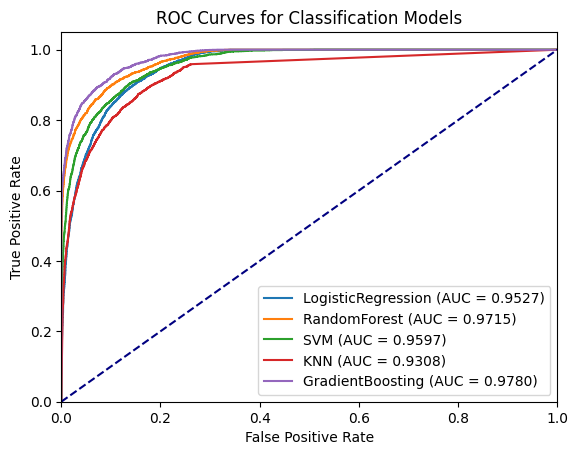

In [ ]:
best_models = {}
for name, model in models.items():
    print(f"Training {name}...")
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_models[name] = best_model

    # Предсказания и оценка на тестовой выборке
    y_pred = best_model.predict(X_test)

    # Выводим метрики
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Accuracy for {name}: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision for {name}: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall for {name}: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score for {name}: {f1_score(y_test, y_pred):.4f}")
    print("-" * 30)
    # Рассчитываем вероятности для построения ROC-кривой
    if hasattr(best_model, "predict_proba"):
        y_proba = best_model.predict_proba(X_test)[:, 1]
    else:  # Для SVM используем decision_function
        y_proba = best_model.decision_function(X_test)

    # Построение ROC-кривой
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

# Настройка графика ROC-кривых
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Classification Models')
plt.legend(loc="lower right")
plt.show()

Таким образом, наилучщая модель - Градиентный бустинг, по всем метрикам